# 超市销售分析和客户分析

### 导包导数据

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
filepath1="E:\\homework\\NumericalPython\\Basket-2018-06-01-2018-07-05.csv"
Basket=pd.read_csv(filepath1)
Basket.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


In [3]:
filepath2="E:\\homework\\NumericalPython\\item-2018-06-01-2018-07-05.csv"
Item=pd.read_csv(filepath2)
Item.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


## 超市销售分析

### 查看数据信息

In [4]:
Basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571552 entries, 0 to 571551
Data columns (total 5 columns):
SHOP_DATETIME    571552 non-null object
STORE_CODE       571552 non-null object
POS_NO           571552 non-null int64
BASK_CODE        571552 non-null int64
BASK_SPEND       571552 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 21.8+ MB


In [5]:
Item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732761 entries, 0 to 1732760
Data columns (total 10 columns):
SDATE              object
STORE_CODE         object
POSID              int64
BASK_CODE          int64
PROD_CODE          int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE      object
DISCOUNT_AMOUNT    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 132.2+ MB


### 判断是否有缺失值

In [6]:
Basket.apply(lambda x: sum(x.isnull()) / len(x), axis=0)

SHOP_DATETIME    0.0
STORE_CODE       0.0
POS_NO           0.0
BASK_CODE        0.0
BASK_SPEND       0.0
dtype: float64

In [7]:
Item.apply(lambda x: sum(x.isnull()) / len(x), axis=0)

SDATE              0.0
STORE_CODE         0.0
POSID              0.0
BASK_CODE          0.0
PROD_CODE          0.0
ITEM_QUANTITY      0.0
ITEM_SPEND         0.0
NORMAL_PRICE       0.0
DISCOUNT_TYPE      0.0
DISCOUNT_AMOUNT    0.0
dtype: float64

无缺失值

### 按日期分类汇总营业额，并可视化

In [8]:
DailyTurnover= Basket.groupby('SHOP_DATETIME')['BASK_SPEND'].sum()
DailyTurnover

SHOP_DATETIME
2018-06-01     717327.28
2018-06-02     727910.16
2018-06-03     682779.75
2018-06-04     557813.05
2018-06-05     663394.81
2018-06-06     498250.71
2018-06-07     436109.19
2018-06-08     564402.27
2018-06-09     679629.48
2018-06-10     702961.56
2018-06-11     532263.20
2018-06-12     569290.86
2018-06-13     722874.45
2018-06-14     615684.90
2018-06-15     774897.74
2018-06-16    1172798.62
2018-06-17    1506093.31
2018-06-18    1257825.41
2018-06-19     412881.99
2018-06-20     533702.81
2018-06-21     493064.51
2018-06-22     411610.22
2018-06-23     582622.57
2018-06-24     529053.77
2018-06-25     454961.04
2018-06-26     453298.13
2018-06-27     527871.74
2018-06-28     438126.70
2018-06-29     568749.99
2018-06-30     719873.69
2018-07-01     653284.63
2018-07-02     520731.01
2018-07-03     542603.77
2018-07-04     559139.42
2018-07-05     491390.33
Name: BASK_SPEND, dtype: float64

Text(0,0.5,'营业额（元）')

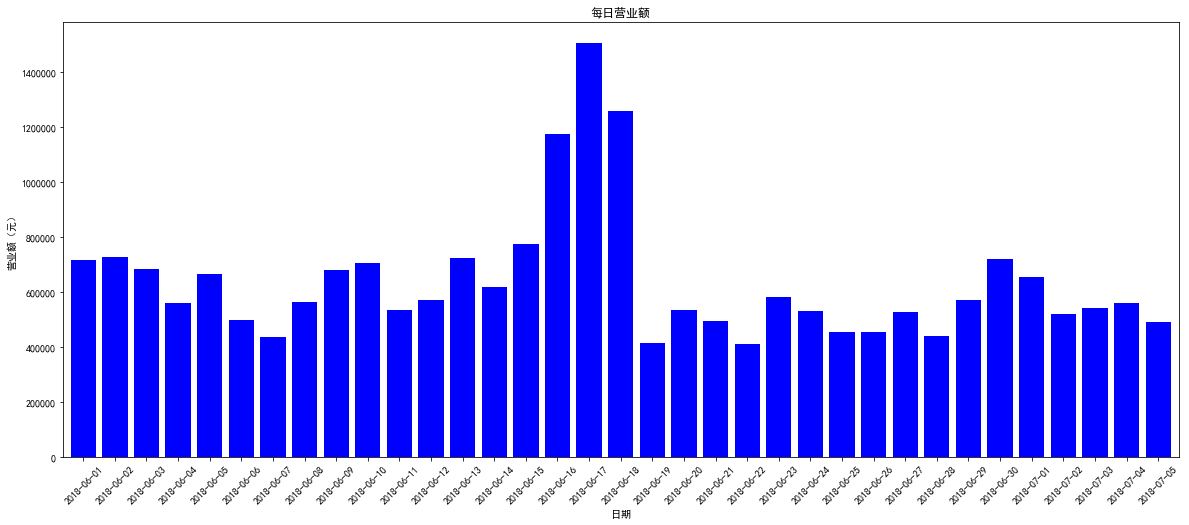

In [9]:
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签 
DailyTurnover.plot(kind='bar',color="blue",title="每日营业额",figsize=(20,8),width=0.8)
plt.xticks(rotation=45)
plt.xlabel("日期")
plt.ylabel("营业额（元）")

### 按商铺分类汇总营业额，并可视化

In [10]:
StoreTurnover = Basket.groupby('STORE_CODE')['BASK_SPEND'].sum()
StoreTurnover

STORE_CODE
A001    3.435303e+06
A004    5.123467e+05
A006    9.383050e+05
A007    6.866382e+05
A008    1.311171e+06
A009    7.977389e+05
A010    6.448924e+05
A012    8.469747e+05
A013    1.117126e+06
A016    7.398143e+05
A017    3.945074e+05
A018    5.584417e+05
A019    6.486686e+05
A021    7.387401e+05
A022    4.874459e+05
D002    3.129447e+06
D003    2.435843e+05
D004    8.078603e+05
D005    5.541030e+05
D006    7.935042e+05
D007    1.361607e+06
D008    6.930078e+05
D009    4.704280e+05
D010    3.636179e+05
Name: BASK_SPEND, dtype: float64

Text(0,0.5,'营业额（元）')

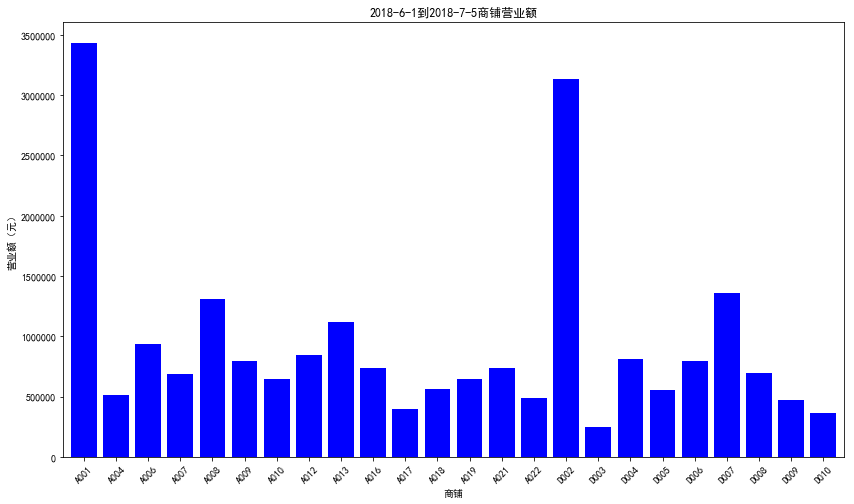

In [11]:
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签 
StoreTurnover.plot(kind='bar',color="blue",title="2018-6-1到2018-7-5商铺营业额",figsize=(14,8),width=0.8)
plt.xticks(rotation=45)
plt.xlabel("商铺")
plt.ylabel("营业额（元）")

### 按商铺分类汇总每日营业额，并可视化

In [12]:
StoreDailyTurnover = Basket.groupby(['STORE_CODE','SHOP_DATETIME'])[['BASK_SPEND']].sum()
StoreDailyTurnover

BASK_SPEND
STORE_CODE SHOP_DATETIME            
A001       2018-06-01      101971.08
           2018-06-02       78829.76
           2018-06-03       79162.82
           2018-06-04       53990.84
           2018-06-05       81708.30
           2018-06-06       79167.81
           2018-06-07       59450.59
           2018-06-08       65490.97
           2018-06-09      128980.30
           2018-06-10       95312.58
           2018-06-11       79403.76
           2018-06-12      104093.21
           2018-06-13      123849.34
           2018-06-14       94912.87
           2018-06-15      139586.92
           2018-06-16      312102.30
           2018-06-17      324323.29
           2018-06-18      204457.64
           2018-06-19       53757.07
           2018-06-20       85382.17
           2018-06-21       67307.82
           2018-06-22       60339.19
           2018-06-23       80734.51
           2018-06-24       75519.24
           2018-06-25       64212.92
           2018-06-26       68054.72
           2018-06-27       72622.72
           2018-06-28       55328.60
           2018-06-29       80056.55
           2018-06-30       96779.60
...                              ...
D010       2018-06-06        7399.43
           2018-06-07        6092.84
           2018-06-08        9189.23
           2018-06-09        8734.05
           2018-06-10        9756.03
           2018-06-11        7019.06
           2018-06-12        7986.64
           2018-06-13       16255.41
           2018-06-14        9622.02
           2018-06-15        9917.27
           2018-06-16       10749.31
           2018-06-17       13938.28
           2018-06-18       12506.37
           2018-06-19        6195.97
           2018-06-20        9832.95
           2018-06-21        7856.04
           2018-06-22        8705.35
           2018-06-23       12218.14
           2018-06-24       11059.92
           2018-06-25        7558.33
           2018-06-26        6974.78
           2018-06-27        9806.22
           2018-06-28        9772.18
           2018-06-29        8572.54
           2018-06-30       12713.65
           2018-07-01       10267.59
           2018-07-02       10359.38
           2018-07-03        7817.37
           2018-07-04        9528.12
           2018-07-05        9600.31

[840 rows x 1 columns]

### 展示A001商铺每日的营业额，直观了解营业额多少
### 同理可以画出每个商铺的营业额情况图

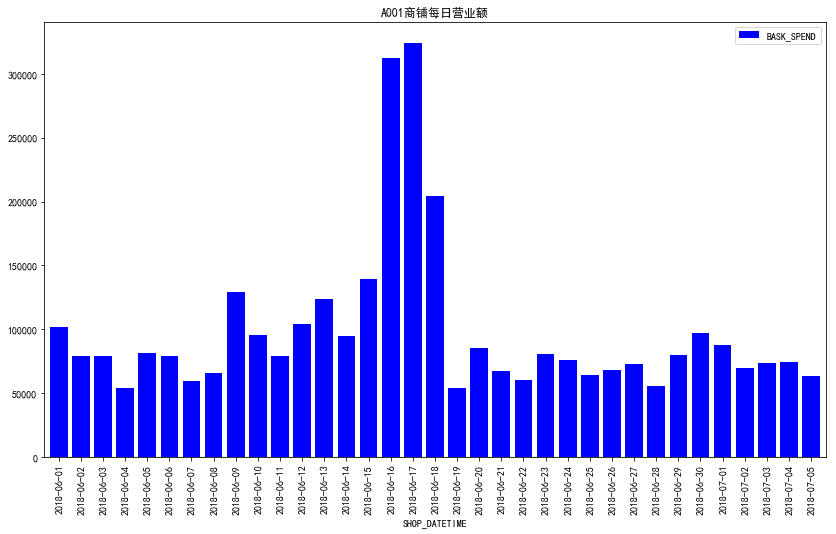

In [13]:
StoreDailyTurnover.loc['A001'].plot(kind='bar',color="blue",title="A001商铺每日营业额",figsize=(14,8),width=0.8)

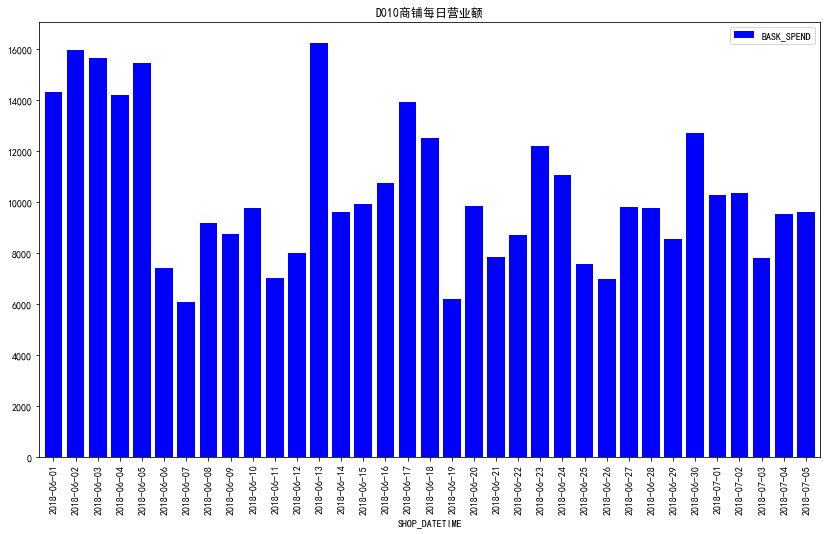

In [14]:
StoreDailyTurnover.loc['D010'].plot(kind='bar',color="blue",title="D010商铺每日营业额",figsize=(14,8),width=0.8)

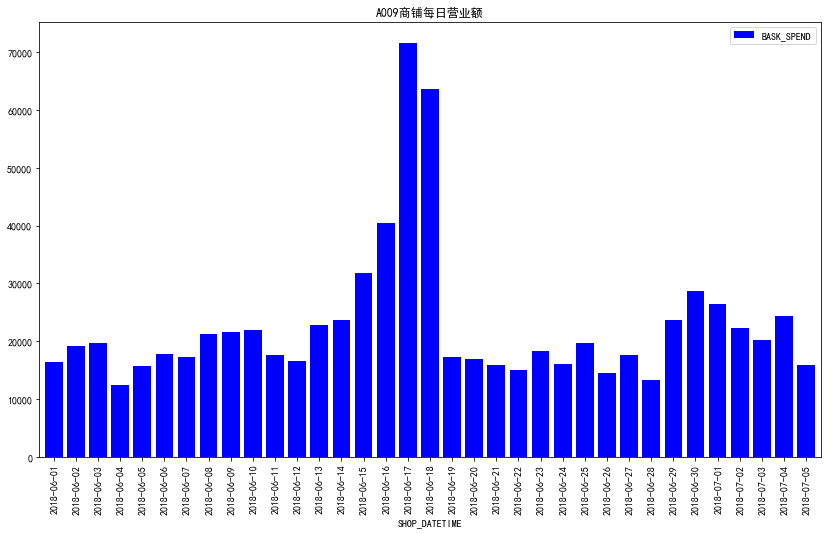

In [15]:
StoreDailyTurnover.loc['A009'].plot(kind='bar',color="blue",title="A009商铺每日营业额",figsize=(14,8),width=0.8)

### 按日期分类汇总每个商铺的营业额

In [16]:
DailyStoreTurnover= Basket.groupby(['SHOP_DATETIME','STORE_CODE'])[['BASK_SPEND']].sum()
DailyStoreTurnover

BASK_SPEND
SHOP_DATETIME STORE_CODE            
2018-06-01    A001         101971.08
              A004          14150.15
              A006          26030.72
              A007          17852.97
              A008          30640.96
              A009          16385.23
              A010          16300.65
              A012          19861.13
              A013          28527.41
              A016          19869.10
              A017           9029.29
              A018          18969.13
              A019          14964.73
              A021          17177.69
              A022          13259.52
              D002         145214.53
              D003           7643.14
              D004          30569.62
              D005          23083.06
              D006          26467.53
              D007          59981.88
              D008          28572.57
              D009          16487.55
              D010          14317.64
2018-06-02    A001          78829.76
              A004          12703.12
              A006          30289.97
              A007          17054.69
              A008          38710.92
              A009          19239.32
...                              ...
2018-07-04    D005          17141.44
              D006          21069.21
              D007          33298.38
              D008          14548.80
              D009          15079.38
              D010           9528.12
2018-07-05    A001          63646.30
              A004          13951.44
              A006          17822.67
              A007          11569.09
              A008          23918.81
              A009          15906.64
              A010          20001.10
              A012          13016.85
              A013          23559.48
              A016          20528.58
              A017           7561.39
              A018          15377.81
              A019          13074.81
              A021          12854.31
              A022          11716.89
              D002          79635.70
              D003           5102.22
              D004          17887.57
              D005          16430.37
              D006          17412.82
              D007          31622.61
              D008          17266.90
              D009          11925.66
              D010           9600.31

[840 rows x 1 columns]

### 可展示某一天各个商铺的营业额情况

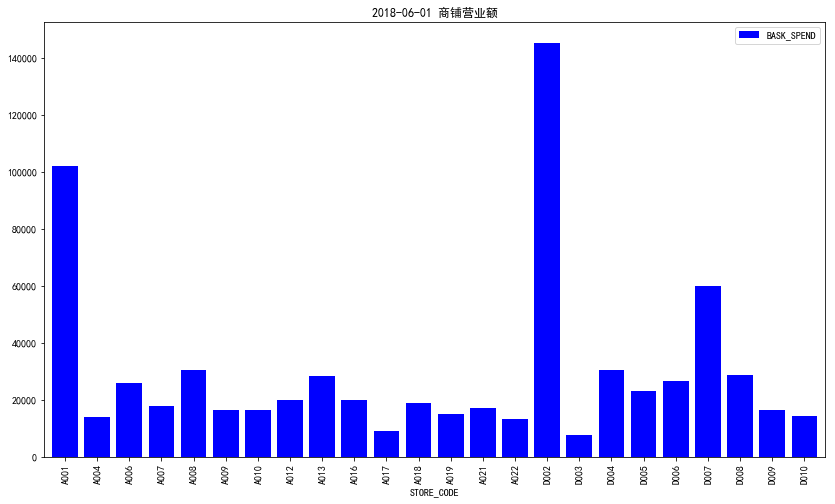

In [17]:
DailyStoreTurnover.loc['2018-06-01'].plot(kind='bar',color="blue",title="2018-06-01 商铺营业额",figsize=(14,8),width=0.8)

### 本次分析的数据时间粒度为一个月，故以月为粒度研究发现不大，可将月转化为星期。

In [18]:
from datetime import datetime
week=[]
for index in range(len(Basket.SHOP_DATETIME)):
    week += [datetime.strptime(Basket.SHOP_DATETIME[index],"%Y-%m-%d").weekday()+1]
Basket['SHOP_WEEK']=week

### 按星期分类汇总商铺营业额，并可视化

In [19]:
WeekTurnover= Basket.groupby('SHOP_WEEK')['BASK_SPEND'].sum()
WeekTurnover

SHOP_WEEK
1    3.323594e+06
2    2.641470e+06
3    2.841839e+06
4    2.474376e+06
5    3.036987e+06
6    3.882835e+06
7    4.074173e+06
Name: BASK_SPEND, dtype: float64

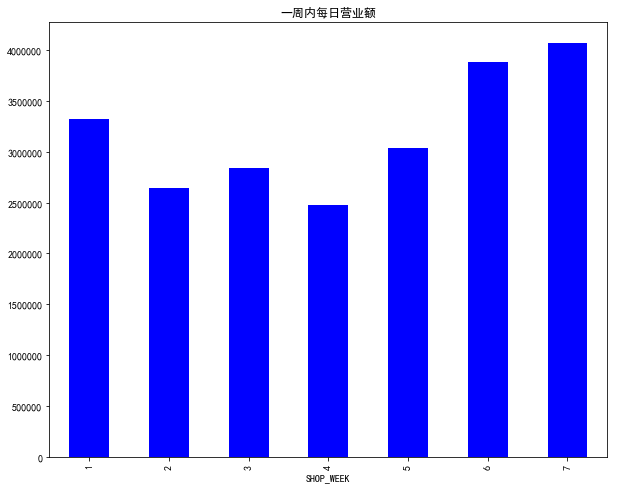

In [20]:
WeekTurnover.plot(kind='bar',color="blue",title="一周内每日营业额",figsize=(10,8))

### 按商铺分类汇总一周内的营业额

In [21]:
StoreWeekTurnover = Basket.groupby(['STORE_CODE','SHOP_WEEK'])[['BASK_SPEND']].sum()
StoreWeekTurnover

BASK_SPEND
STORE_CODE SHOP_WEEK            
A001       1           472017.39
           2           381032.57
           3           435021.76
           4           340646.18
           5           447444.71
           6           697426.47
           7           661713.98
A004       1            79852.84
           2            66858.83
           3            65185.46
           4            56722.94
           5            69600.86
           6            81761.81
           7            92363.93
A006       1           140879.28
           2           108541.61
           3           119355.97
           4           102073.84
           5           127921.97
           6           159742.19
           7           179790.11
A007       1           112019.93
           2            66005.01
           3            86584.89
           4            73648.53
           5            93341.48
           6           120031.15
           7           135007.17
A008       1           214457.08
           2           138191.26
...                          ...
D006       6           143125.00
           7           138331.68
D007       1           208531.64
           2           184823.07
           3           189947.50
           4           158953.41
           5           182970.90
           6           223944.55
           7           212435.51
D008       1           101284.68
           2            94071.08
           3            82560.75
           4            77454.43
           5           100652.68
           6           121700.01
           7           115284.13
D009       1            69919.55
           2            61923.03
           3            63055.53
           4            58396.91
           5            66965.86
           6            78963.85
           7            71203.23
D010       1            51664.99
           2            44422.83
           3            52822.13
           4            42943.39
           5            50702.03
           6            60388.95
           7            60673.55

[168 rows x 1 columns]

### 查看A001商铺一周内的营业额占比，同理可以了解任何一个商铺的情况

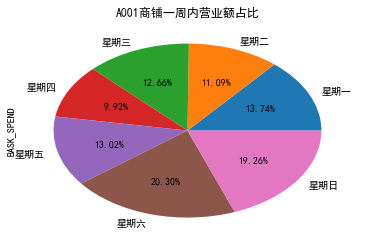

In [22]:
week=['星期一','星期二','星期三','星期四','星期五','星期六','星期日']
StoreWeekTurnover.loc['A001']['BASK_SPEND'].plot(kind='pie',labels=week,title="A001商铺一周内营业额占比",autopct='%.2f%%')

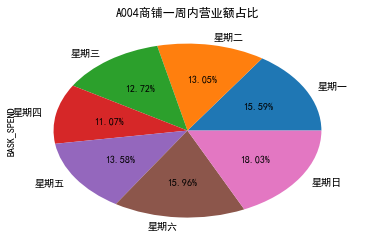

In [23]:
StoreWeekTurnover.loc['A004']['BASK_SPEND'].plot(kind='pie',labels=week,title="A004商铺一周内营业额占比",autopct='%.2f%%')

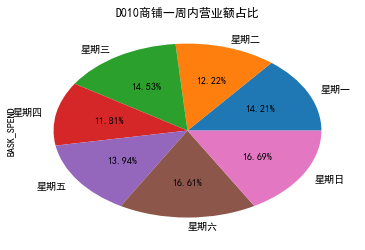

In [24]:
StoreWeekTurnover.loc['D010']['BASK_SPEND'].plot(kind='pie',labels=week,title="D010商铺一周内营业额占比",autopct='%.2f%%')

### 按商铺分类汇总一星期每天的营业额

In [25]:
WeekStoreTurnover= Basket.groupby(['SHOP_WEEK','STORE_CODE'])[['BASK_SPEND']].sum()
WeekStoreTurnover

BASK_SPEND
SHOP_WEEK STORE_CODE            
1         A001         472017.39
          A004          79852.84
          A006         140879.28
          A007         112019.93
          A008         214457.08
          A009         135757.11
          A010          97784.78
          A012         127789.36
          A013         175108.68
          A016         103253.50
          A017          63236.68
          A018          79467.85
          A019         115857.72
          A021         108197.45
          A022          73066.65
          D002         431956.46
          D003          35836.09
          D004         120932.82
          D005          84991.07
          D006         119730.11
          D007         208531.64
          D008         101284.68
          D009          69919.55
          D010          51664.99
2         A001         381032.57
          A004          66858.83
          A006         108541.61
          A007          66005.01
          A008         138191.26
          A009          84234.16
...                          ...
6         D005          95086.20
          D006         143125.00
          D007         223944.55
          D008         121700.01
          D009          78963.85
          D010          60388.95
7         A001         661713.98
          A004          92363.93
          A006         179790.11
          A007         135007.17
          A008         273692.30
          A009         155682.23
          A010         124282.35
          A012         146219.24
          A013         215782.05
          A016         144661.96
          A017          68320.10
          A018          99081.50
          A019         135553.75
          A021         128635.64
          A022          84079.31
          D002         557231.68
          D003          43152.24
          D004         134834.38
          D005          96161.00
          D006         138331.68
          D007         212435.51
          D008         115284.13
          D009          71203.23
          D010          60673.55

[168 rows x 1 columns]

### 展示星期一各个商铺的营业额，同理可以展示每一天的

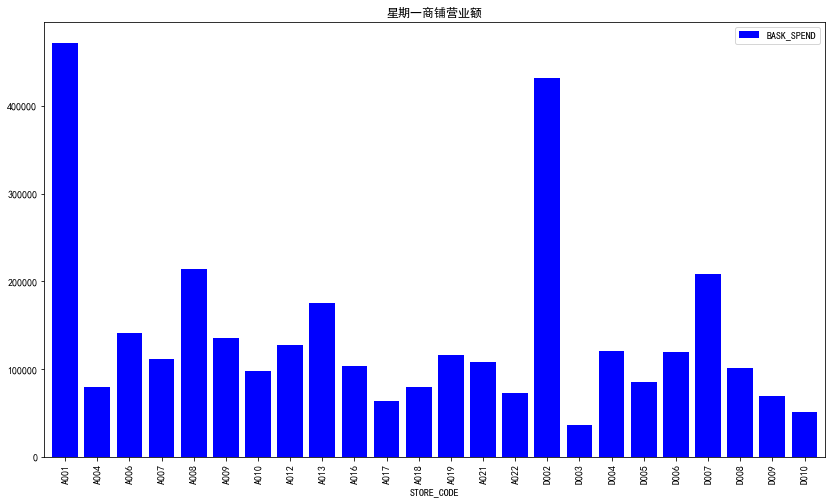

In [26]:
WeekStoreTurnover.loc[1].plot(kind='bar',color="blue",title="星期一商铺营业额",figsize=(14,8),width=0.8)

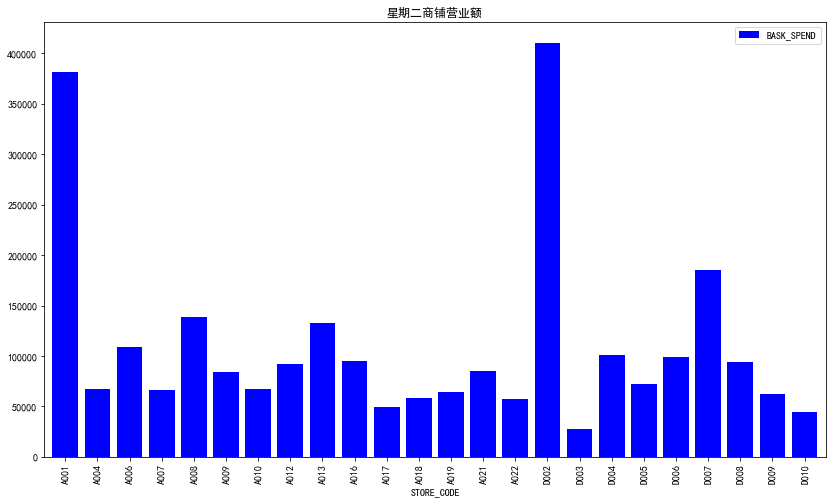

In [27]:
WeekStoreTurnover.loc[2].plot(kind='bar',color="blue",title="星期二商铺营业额",figsize=(14,8),width=0.8)

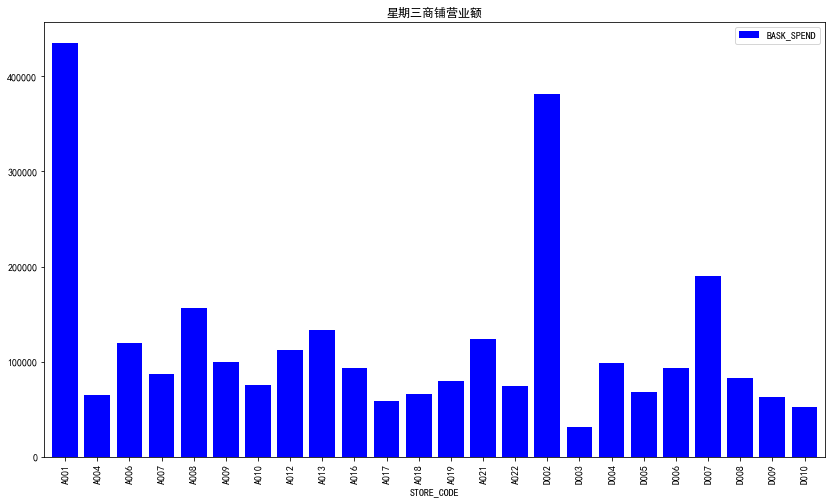

In [28]:
WeekStoreTurnover.loc[3].plot(kind='bar',color="blue",title="星期三商铺营业额",figsize=(14,8),width=0.8)

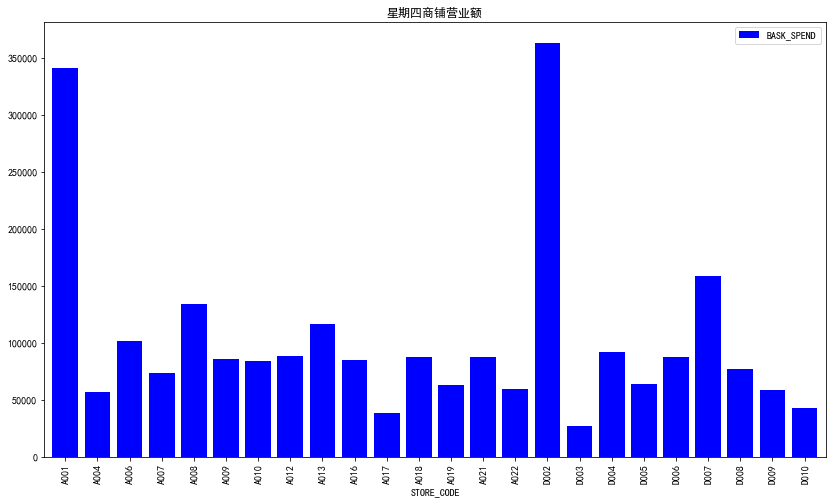

In [29]:
WeekStoreTurnover.loc[4].plot(kind='bar',color="blue",title="星期四商铺营业额",figsize=(14,8),width=0.8)

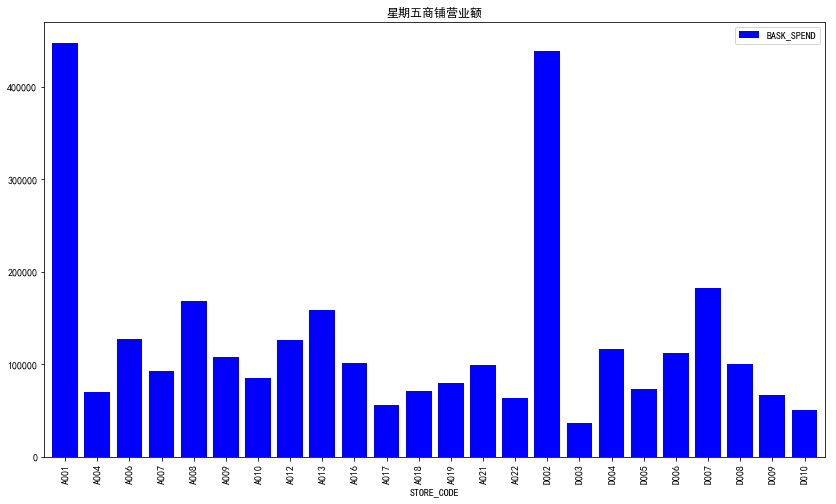

In [30]:
WeekStoreTurnover.loc[5].plot(kind='bar',color="blue",title="星期五商铺营业额",figsize=(14,8),width=0.8)

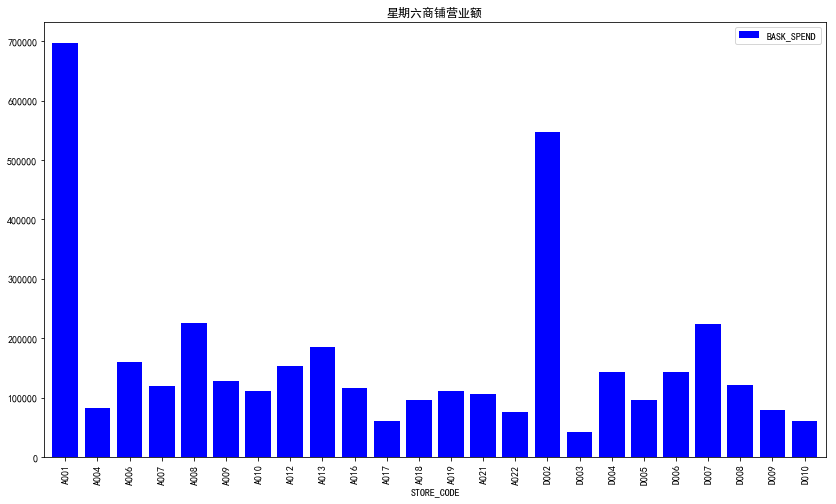

In [31]:
WeekStoreTurnover.loc[6].plot(kind='bar',color="blue",title="星期六商铺营业额",figsize=(14,8),width=0.8)

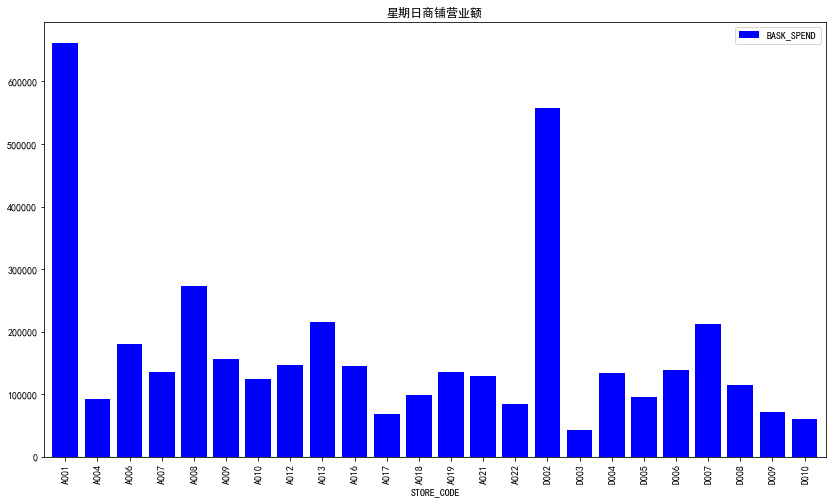

In [32]:
WeekStoreTurnover.loc[7].plot(kind='bar',color="blue",title="星期日商铺营业额",figsize=(14,8),width=0.8)

### 商品分析

### 处理商品数量值为负的异常值，改为正数

In [33]:
Item['ITEM_QUANTITY']=abs(Item['ITEM_QUANTITY'])

### 商品价格箱型图分析

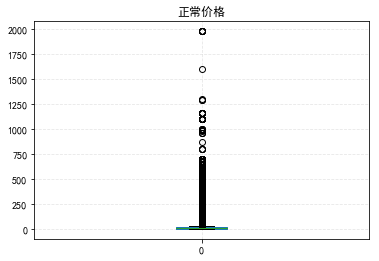

In [34]:
normal_price_array = np.array(Item['NORMAL_PRICE'])
 
df = pd.DataFrame(normal_price_array)
df.plot.box(title="正常价格")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

### 商品价格0-20价格箱型图分析

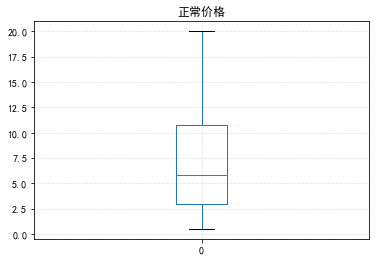

In [35]:
Item_normal=Item.loc[(Item['NORMAL_PRICE']<=20)]
normal_price_array = np.array(Item_normal['NORMAL_PRICE'])
 
df = pd.DataFrame(normal_price_array)
df.plot.box(title="正常价格")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

In [36]:
item_new = Item[['BASK_CODE', 'PROD_CODE']]

### 店铺促销情况分析

In [37]:
discount_storeid = Item.groupby(by="STORE_CODE")["DISCOUNT_AMOUNT"].sum().sort_values(ascending=True)
discount_storeid.head(10)

STORE_CODE
D002   -465244.61
A001   -454457.05
D007   -215108.26
A008   -138164.49
A013   -135125.86
A012   -116310.50
A006   -115700.27
D004   -109239.76
D008    -90824.42
D006    -84627.86
Name: DISCOUNT_AMOUNT, dtype: float64

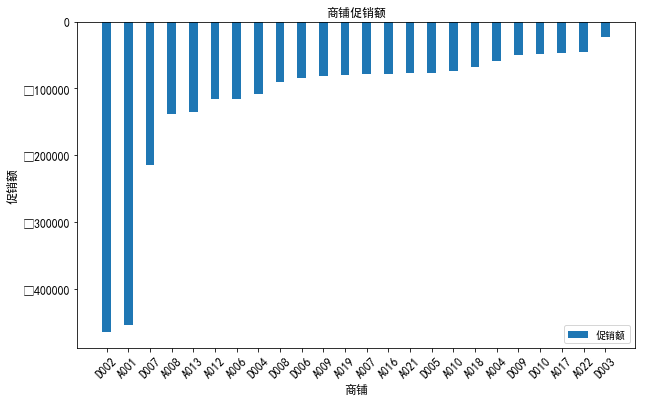

In [38]:
plt.figure(figsize=(10,6))
x=discount_storeid.index.tolist()
y=discount_storeid.values.tolist()
width = 0.4
p2 = plt.bar(x, y, width, label="促销额")
plt.xlabel('商铺',fontsize=12)
plt.ylabel('促销额',fontsize=12)
plt.title('商铺促销额',fontsize=12) 
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc="lower right") 
plt.show()

### 相关性分析

In [39]:
#关联关系
print(Item.corr(method='pearson'))   #协方差矩阵

                    POSID  BASK_CODE  PROD_CODE  ITEM_QUANTITY  ITEM_SPEND  \
POSID            1.000000  -0.093078  -0.007516       0.005695    0.019737   
BASK_CODE       -0.093078   1.000000   0.003042      -0.011182   -0.013570   
PROD_CODE       -0.007516   0.003042   1.000000      -0.007539    0.004962   
ITEM_QUANTITY    0.005695  -0.011182  -0.007539       1.000000    0.325871   
ITEM_SPEND       0.019737  -0.013570   0.004962       0.325871    1.000000   
NORMAL_PRICE     0.052431  -0.017298   0.093936      -0.018375    0.231680   
DISCOUNT_AMOUNT -0.005892   0.005220  -0.013600      -0.180876   -0.710971   

                 NORMAL_PRICE  DISCOUNT_AMOUNT  
POSID                0.052431        -0.005892  
BASK_CODE           -0.017298         0.005220  
PROD_CODE            0.093936        -0.013600  
ITEM_QUANTITY       -0.018375        -0.180876  
ITEM_SPEND           0.231680        -0.710971  
NORMAL_PRICE         1.000000        -0.080423  
DISCOUNT_AMOUNT     -0.080423   

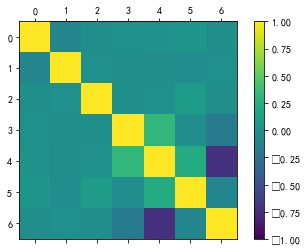

In [40]:
#相关矩阵图
#names = ['item_quantity','item_spend','normal_price','discount_amount','order_week']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(Item.corr(), vmin=-1,vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 7, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(names,rotation=45,fontsize=12)
#ax.set_yticklabels(names,fontsize=12)
plt.show()

### 用户角度分析

In [41]:
user_grouped=Item.groupby('BASK_CODE').sum()
user_grouped.head()

,POSID,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
BASK_CODE,,,,,,
961,3,7137,1.0,25.0,25.0,0.0
962,6,102942,11.0,132.1,19.6,0.0
964,6,7936,2.0,28.0,28.0,0.0
965,6,38638,2.0,40.0,40.0,0.0
966,3,7133,1.0,12.5,12.5,0.0


In [42]:
user_grouped.describe()

,POSID,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,281211.000000,2.812110e+05,281211.000000,281211.000000,281211.000000,281211.000000
mean,18.454289,7.054386e+05,8.922560,79.211955,87.769193,-10.008166
std,23.066865,6.869107e+05,24.705411,301.311749,100.969038,147.354113
min,1.000000,3.100000e+01,0.010000,-35866.100000,0.500000,-63510.600000
25%,5.000000,2.208340e+05,2.000000,20.490000,22.200000,-10.120000
50%,11.000000,4.989160e+05,5.000000,48.780000,56.500000,-3.000000
75%,23.000000,9.618265e+05,11.134000,98.500000,119.200000,0.000000
max,697.000000,1.000368e+07,6581.000000,80064.900000,4236.900000,1335.980000


### 用户消费购买力

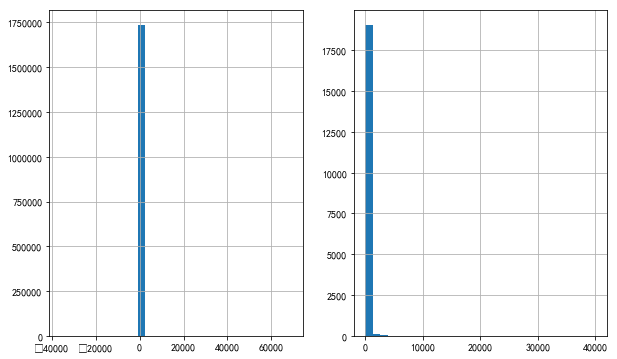

In [43]:
plt.figure(figsize=(10,6))
plt.subplot(121)
Item.ITEM_SPEND.hist(bins=30)

plt.subplot(122)
Item.groupby('PROD_CODE').ITEM_QUANTITY.sum().hist(bins=30)

### 用户消费时间节点分析

In [44]:
Item.groupby('PROD_CODE').SDATE.min().value_counts().head(10)

2018-06-01    7920
2018-06-02    2246
2018-06-03    1213
2018-06-04     699
2018-06-05     665
2018-06-06     579
2018-06-09     471
2018-06-08     446
2018-06-07     418
2018-06-10     367
Name: SDATE, dtype: int64

In [45]:
Item.groupby('PROD_CODE').SDATE.max().value_counts().head(10)

2018-07-05    7497
2018-07-04    2262
2018-07-03    1369
2018-07-02     917
2018-07-01     833
2018-06-30     752
2018-06-29     467
2018-06-28     349
2018-06-24     321
2018-06-27     319
Name: SDATE, dtype: int64